<a href="https://colab.research.google.com/github/ilsurgumerov/MatModLabs_ITMO/blob/main/MatMod_1sem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2: Модель предпочтительного присоединения

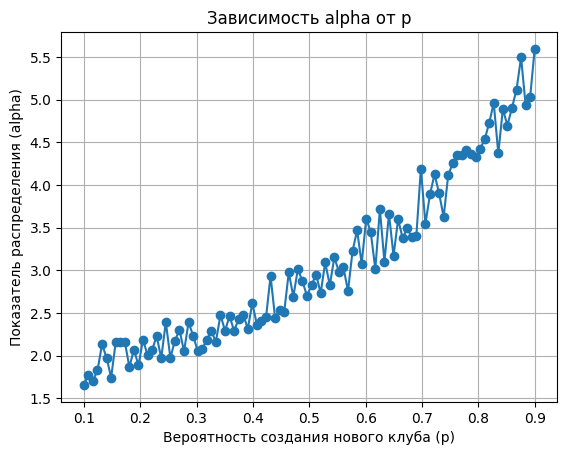

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def simulate_preferential_attachment(p, num_students=2500):
    "Имитирует предпочтительное присоединение."
    clubs = [1]
    for t in range(2, num_students + 1):
        if np.random.rand() < p:
            clubs.append(1)
        else:
            weights = np.array(clubs) / (t - 1)
            chosen = np.random.choice(len(clubs), p=weights / weights.sum())
            clubs[chosen] += 1
    return clubs

def calculate_alpha(sizes):
    "Считает альфа."
    counts, bins = np.histogram(sizes, bins=np.logspace(0, np.log10(max(sizes)), 50), density=True)
    bin_centers = np.sqrt(bins[:-1] * bins[1:])

    x = np.log10(bin_centers[counts > 0])
    y = np.log10(counts[counts > 0])

    model = LinearRegression().fit(x.reshape(-1, 1), y)
    alpha = -model.coef_[0]
    return alpha

p_values = np.linspace(0.1, 0.9, 100)
alphas = []

for p in p_values:
    clubs = simulate_preferential_attachment(p)
    alpha = calculate_alpha(clubs)
    alphas.append(alpha)

plt.plot(p_values, alphas, 'o-')
plt.xlabel('Вероятность создания нового клуба (p)')
plt.ylabel('Показатель распределения (alpha)')
plt.title('Зависимость alpha от p')

plt.grid(True)
plt.show()

Каждый объект либо создает новый клуб с вероятностью p, либо присоединяется к существующему клубу с вероятностью 1 − 𝑝, пропорционально размеру клубов.

Анализ распределения: Используем степенной закон $𝑃(𝑠)∼𝑠^{−\alpha}$ для определения $\alpha$, анализируя распределение размеров клубов.

Проводим симуляцию для нескольких значений 𝑝 и визуализируем, как изменяется $\alpha$ в зависимости от 𝑝.


# Лабораторная работа 3: Лесной пажар

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

GRID_SIZE = 100

In [ ]:
class ForestFire:
    def __init__(self, grid_size, p):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size), dtype=int)
        self.p = p

    def step(self):
        """Выполняет один шаг модели."""
        x, y = random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)

        if self.grid[x, y] == 0:
            if random.random() < self.p:
                self.grid[x, y] = 1

        elif self.grid[x, y] == 1:
            if random.random() < (1 - self.p):
                self.grid[x, y] = 2
                return self.spread_fire(x, y)
        return 0

    def spread_fire(self, x, y):
        """Распространяет огонь на соседние деревья."""
        stack = [(x, y)]
        fire_size = 0
        while stack:
            cx, cy = stack.pop()
            if self.grid[cx, cy] == 2:
                self.grid[cx, cy] = 0
                fire_size += 1

                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                    nx, ny = cx + dx, cy + dy
                    if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size:
                        if self.grid[nx, ny] == 1:
                            self.grid[nx, ny] = 2
                            stack.append((nx, ny))
        return fire_size


In [ ]:
def simulate(p, steps=100000):
    """Проводит симуляцию и собирает размеры пожаров."""
    forest = ForestFire(GRID_SIZE, p)
    fire_sizes = []

    for _ in range(steps):
        fire_size = forest.step()
        if fire_size > 0:
            fire_sizes.append(fire_size)

    return fire_sizes
def analyze_fire_sizes(fire_sizes):
    """Анализирует распределение размеров пожаров."""
    fire_sizes = np.array(fire_sizes)
    unique, counts = np.unique(fire_sizes, return_counts=True)
    probabilities = counts / counts.sum() # как бы считаем вероятность (положит исходы на всего исходы)

    def power_law(x, alpha, c):
        return c * x ** -alpha

    popt, _ = curve_fit(power_law, unique, probabilities, bounds=(-np.inf, np.inf))
    alpha = popt[0]

    plt.figure(figsize=(10, 6))
    plt.plot(unique, probabilities, 'bo', markersize=5, label="Площадь пожара")
    plt.plot(unique, power_law(unique, *popt), 'r-', label=f"Степенная функция для (alpha={alpha:.2f})")
    plt.xlabel("Размер пожара (s)")
    plt.ylabel("Вероянстноть (p)")
    plt.title("Распределение площади пожара и подобранный степенной закон")
    plt.legend()
    plt.grid(True)
    plt.show()

    return alpha

Для того, чтобы было легче все анализировать, мы будет предполагать, что размер пожара напрямую соответствует размеру кластера деревьев, который горит. Когда мы измеряем размер пожара, мы фактически подсчитываем количество деревьев в кластере, который сгорел. В модели каждая группа деревьев, связанная через соседние клетки (включая диагональные), считается кластером. Это помогает не считать на каждом шаге все кластеры дервьев, а просто смотреть на кластер, который сгорел.

Распределение кластеров деревьев описывается степенным законом:

$ p(s) \sim s^{-\alpha} $

где:
- \( p(s) \) — вероятность того, что размер кластера равен \( s \),
- \( $\alpha$ \) — показатель распределения.

Симуляция при p = 0.1


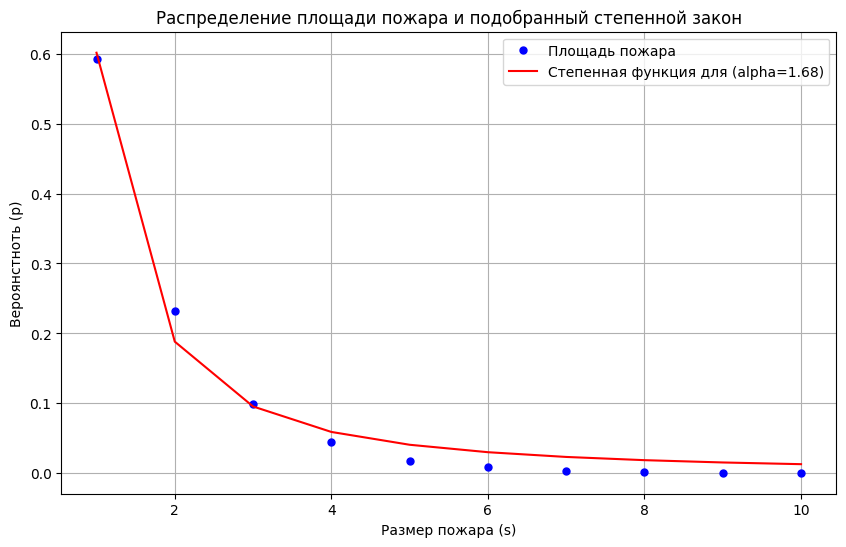

Симуляция при p = 0.2


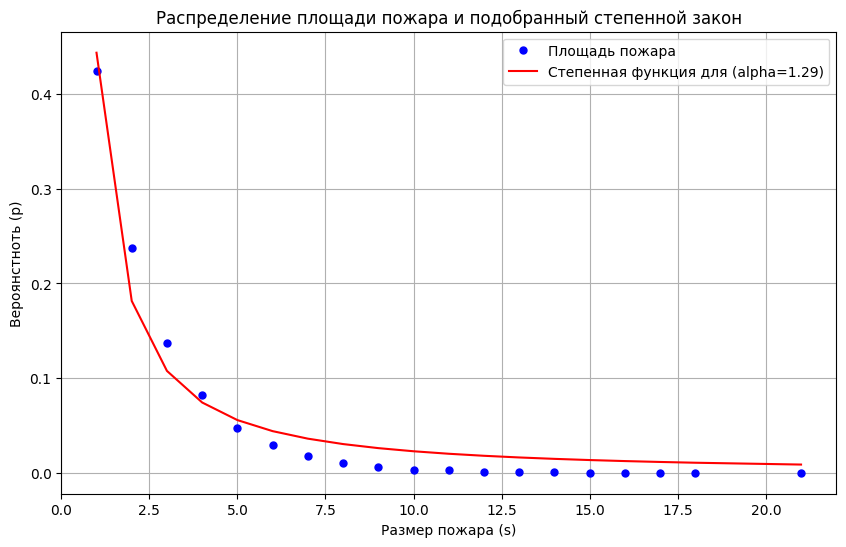

Симуляция при p = 0.3


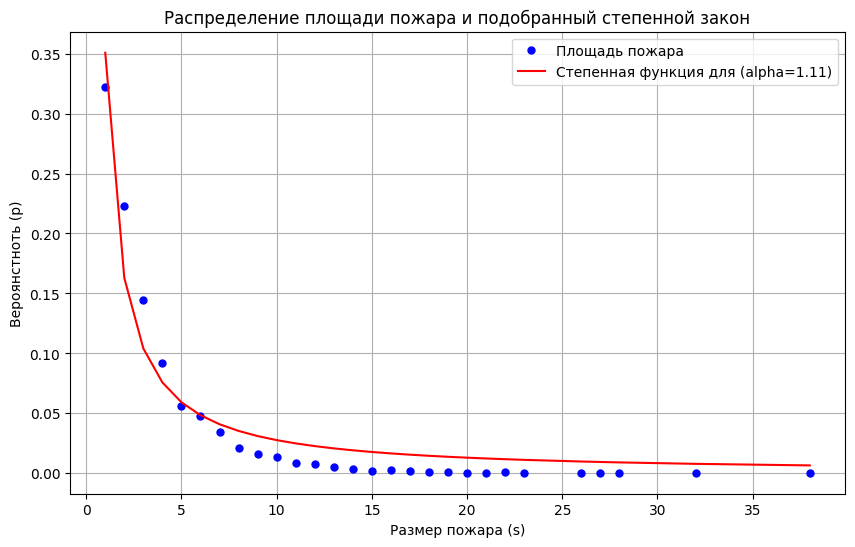

Симуляция при p = 0.4


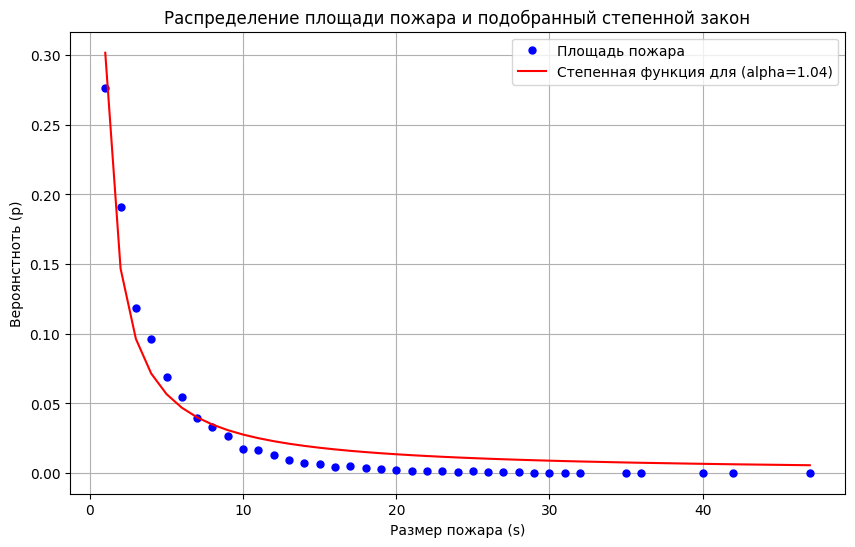

Симуляция при p = 0.5


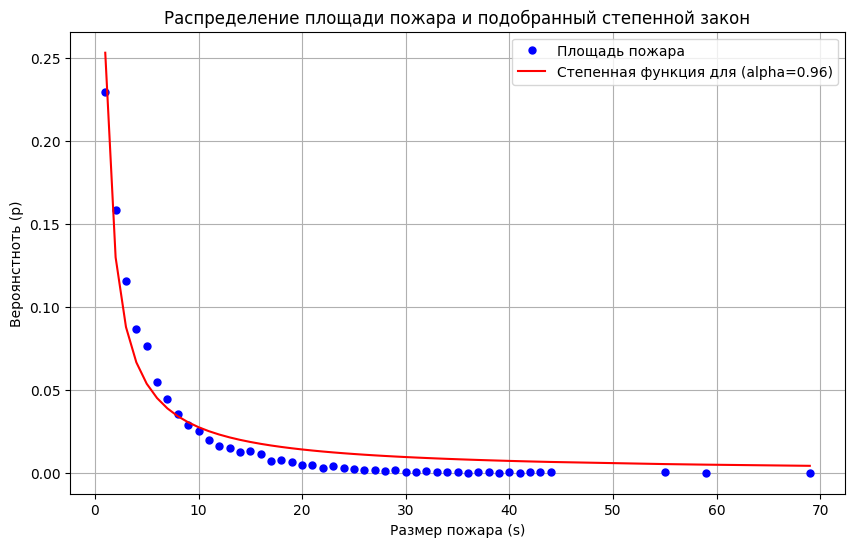

Симуляция при p = 0.6


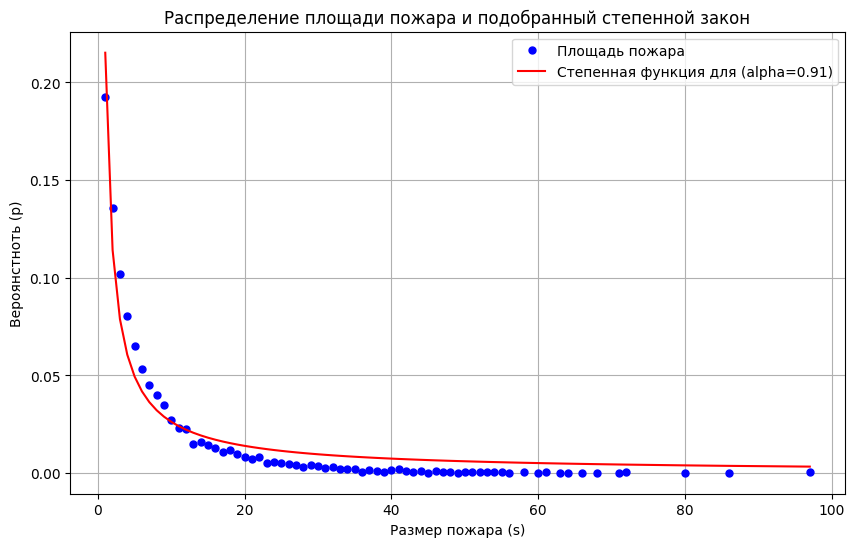

Симуляция при p = 0.7


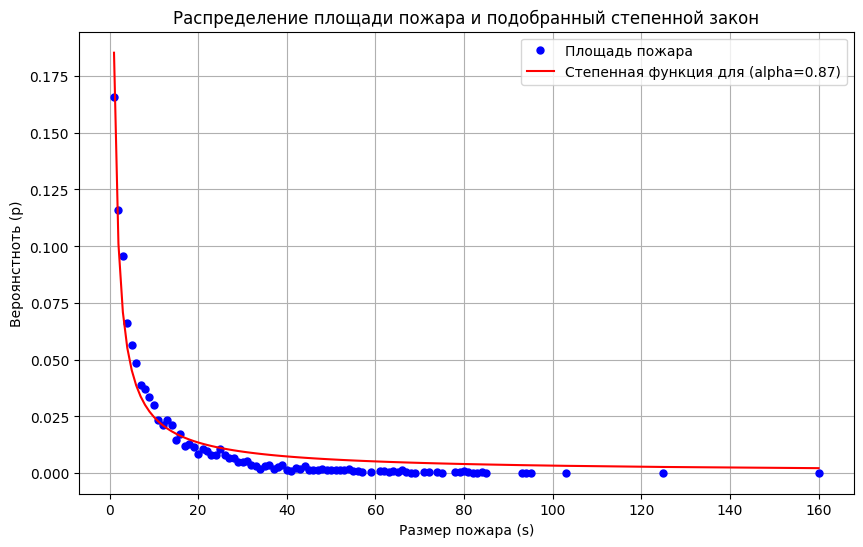

Симуляция при p = 0.8


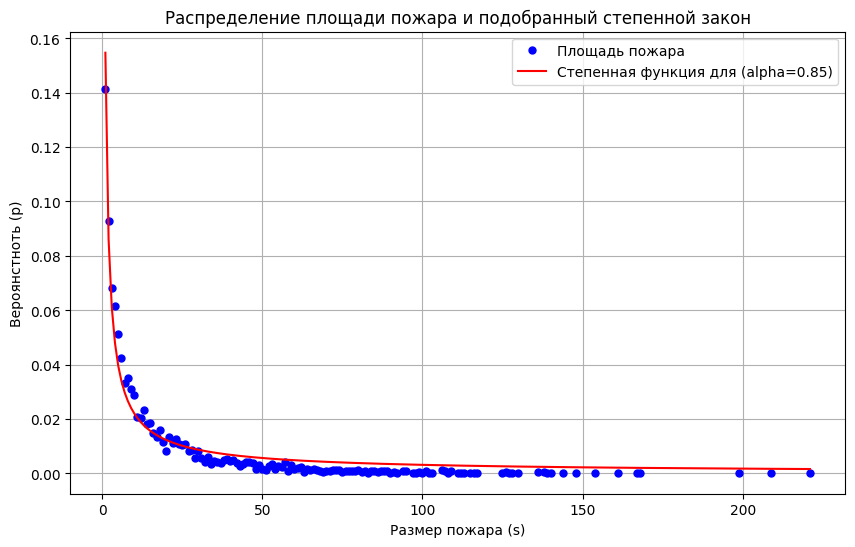

Симуляция при p = 0.9


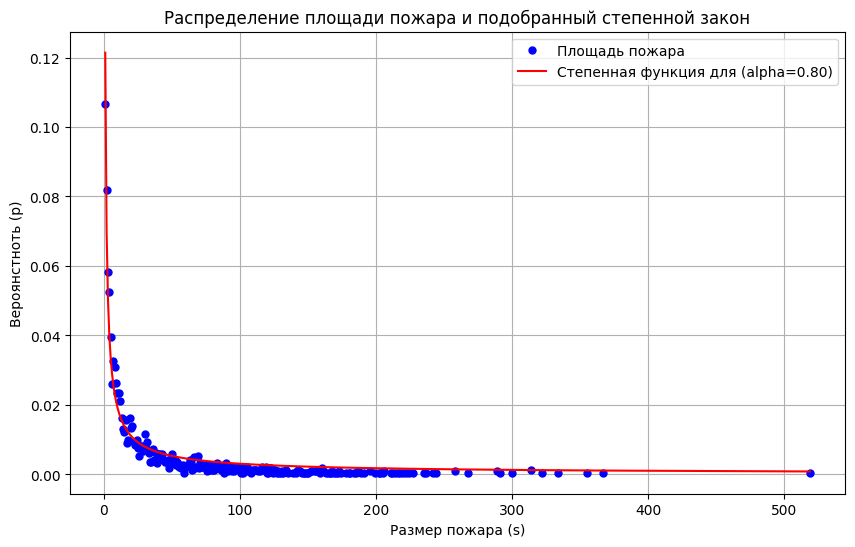

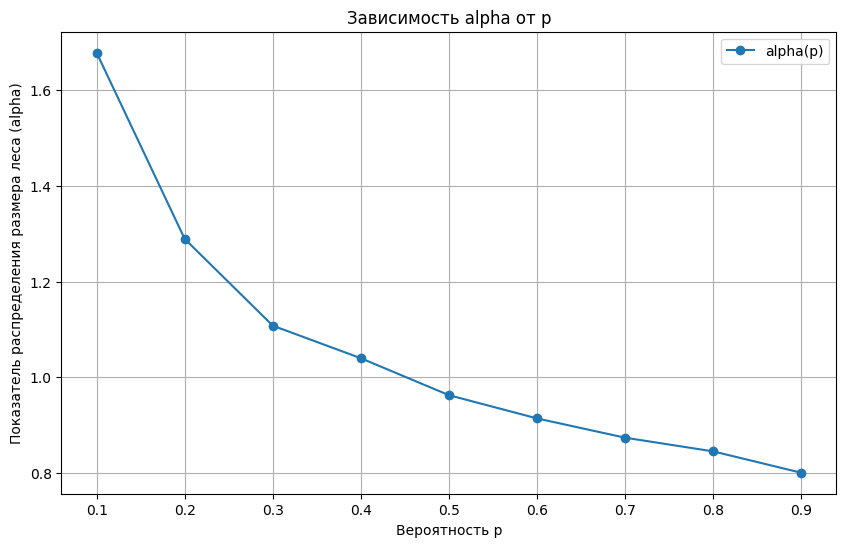

In [ ]:
p_values = np.linspace(0.1, 0.9, 9)
alphas = []

for p in p_values:
    print(f"Симуляция при p = {p:.1f}")
    fire_sizes = simulate(p)
    alpha = analyze_fire_sizes(fire_sizes)
    alphas.append(alpha)

plt.figure(figsize=(10, 6))
plt.plot(p_values, alphas, 'o-', label=f"alpha(p)")
plt.xlabel("Вероятность p")
plt.ylabel("Показатель распределения размера леса (alpha)")
plt.title("Зависимость alpha от p")
plt.legend()
plt.grid(True)
plt.show()

# Лабораторная работа 6: Экономика банановой республики

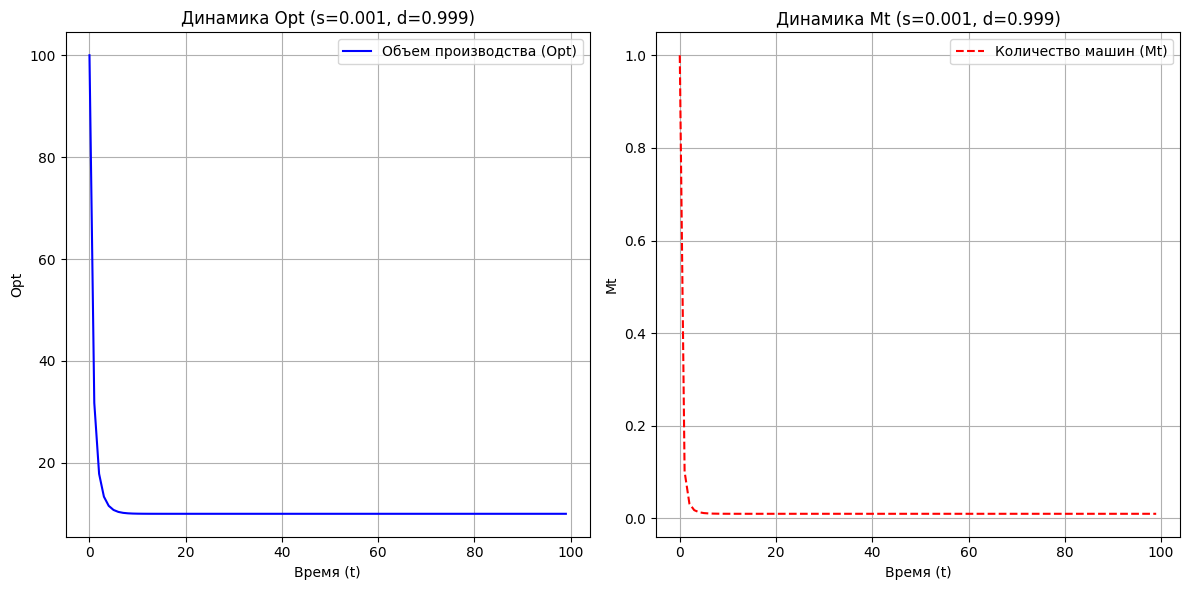

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_economy(s, d, M0=1, T=50):
    """Выполняет симуляцию для заданного числа тактов T"""

    M = [M0]
    Opt = [100 * np.sqrt(M0)]
    Ipt = [s * Opt[0]]
    Cpt = [Opt[0] - Ipt[0]]

    for t in range(1, T):
        M_new = M[t-1] + Ipt[t-1] - d * M[t-1]
        M.append(M_new)

        Opt_new = 100 * np.sqrt(M_new)
        Opt.append(Opt_new)
        Ipt_new = s * Opt_new
        Ipt.append(Ipt_new)
        Cpt_new = Opt_new - Ipt_new
        Cpt.append(Cpt_new)

    return Opt, M, Ipt, Cpt

s = 0.001
d = 0.999
Opt, M, Ipt, Cpt = simulate_economy(s, d, T=100)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(Opt, 'b-', label='Объем производства (Opt)')
plt.xlabel('Время (t)')
plt.ylabel('Opt')
plt.title(f'Динамика Opt (s={s}, d={d})')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(M, 'r--', label='Количество машин (Mt)')
plt.xlabel('Время (t)')
plt.ylabel('Mt')
plt.title(f'Динамика Mt (s={s}, d={d})')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Для анализа модели экономики банановой республики мы предполагаем, что объем производства напрямую зависит от количества машин $M(t)$, используемых в производстве. Каждый период инвестиции I(t) увеличивают количество машин, а амортизация $d \cdot M(t)$ уменьшает его. Равновесие в системе достигается, когда инвестиции полностью компенсируют амортизацию.

Объем производства определяется степенной зависимостью:
$
O(t) = 100 \cdot \sqrt{M(t)},
$
где:
- O(t) — объем производства в момент t,
- M(t) — количество машин в момент t.

Равновесное состояние системы описывается уравнениями:
$
M^* = \left( \frac{100 \cdot s}{d} \right)^2, \quad O^* = \frac{100^2 \cdot s}{d},
$
где:
- $M^*$ — равновесное количество машин,
- $O^*$ — равновесный объем производства,
- s — норма накопления ( 0 < s < 1 ),
- d — норма амортизации ( 0 < d < 1 ).

Значит чем выше s и ниже d, тем выше равновесный уровень производства. Так как необходимо оценить систему при различных s и, так как значение параметра t влияет только на момент времени, в который мы смотрим, мы его будем фиксировать на значении 100. При маленьких значениях этого параметра мы просто не будет достигать состояния равновесия. Рассмотриваются состояния системы при разлиичных s, d, фиксированном t ( такой, чтобы для всех случаев достигалось состояние равновесия )

Если s / d слишком мало, инвестиций недостаточно для компенсации амортизации: M(t) уменьшается.

Если s / d оптимально, система сходится к равновесию.

Если s / d слишком велико, модель может демонстрировать нереалистичный рост (в реальности ограничен ресурсами).


Модель демонстрирует, как параметры s и d влияют на устойчивость и рост экономики. Оптимальное управление требует баланса между инвестициями в производство и текущим потреблением

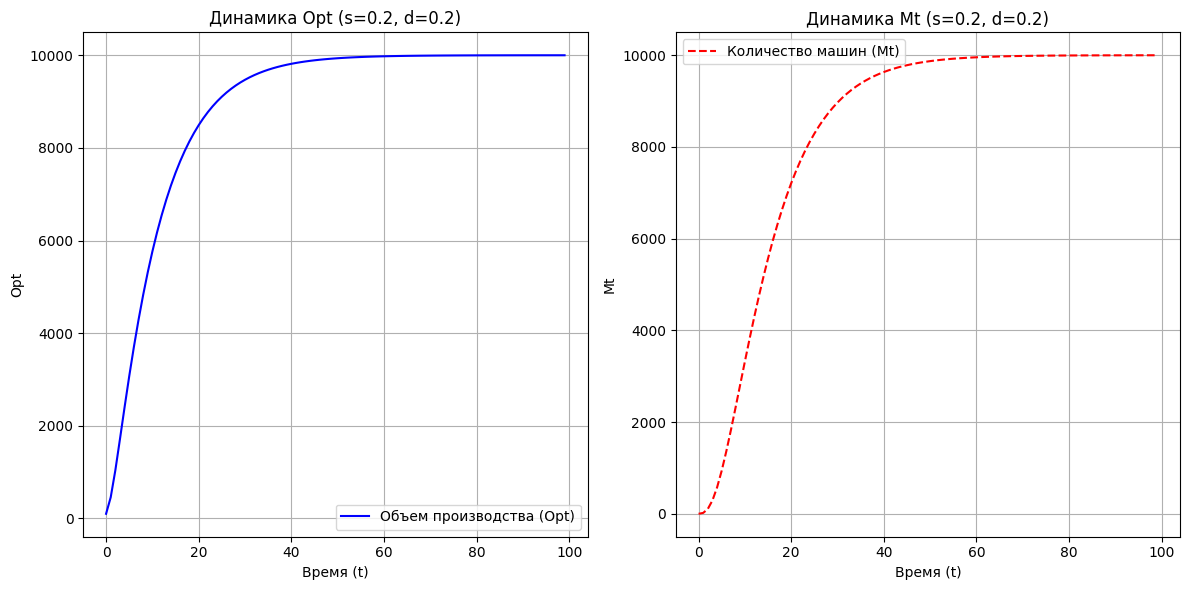

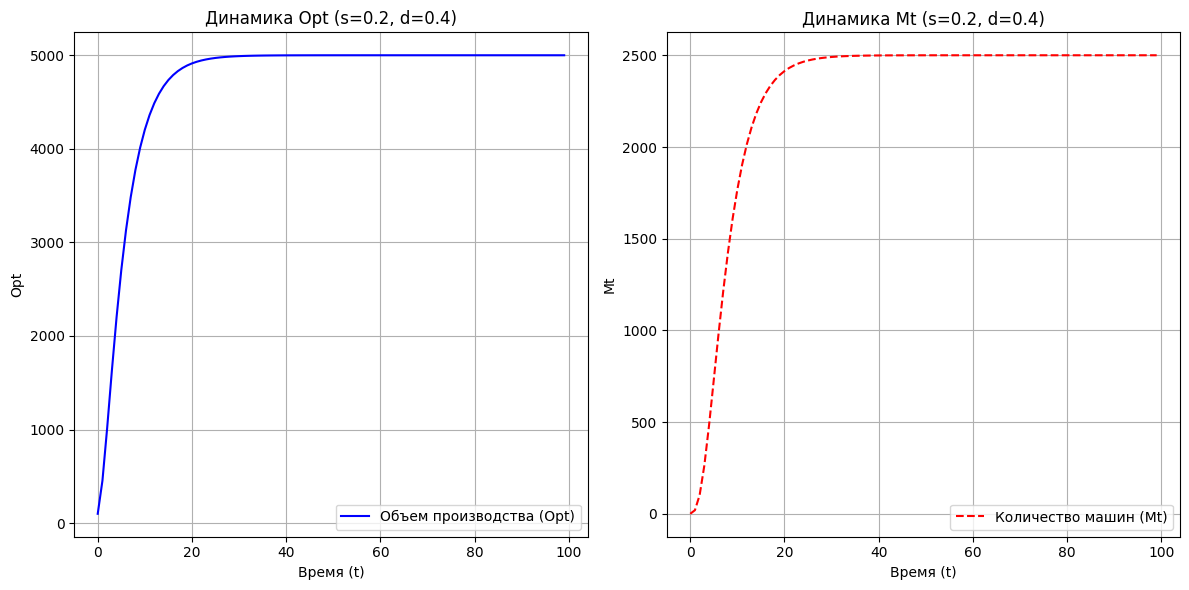

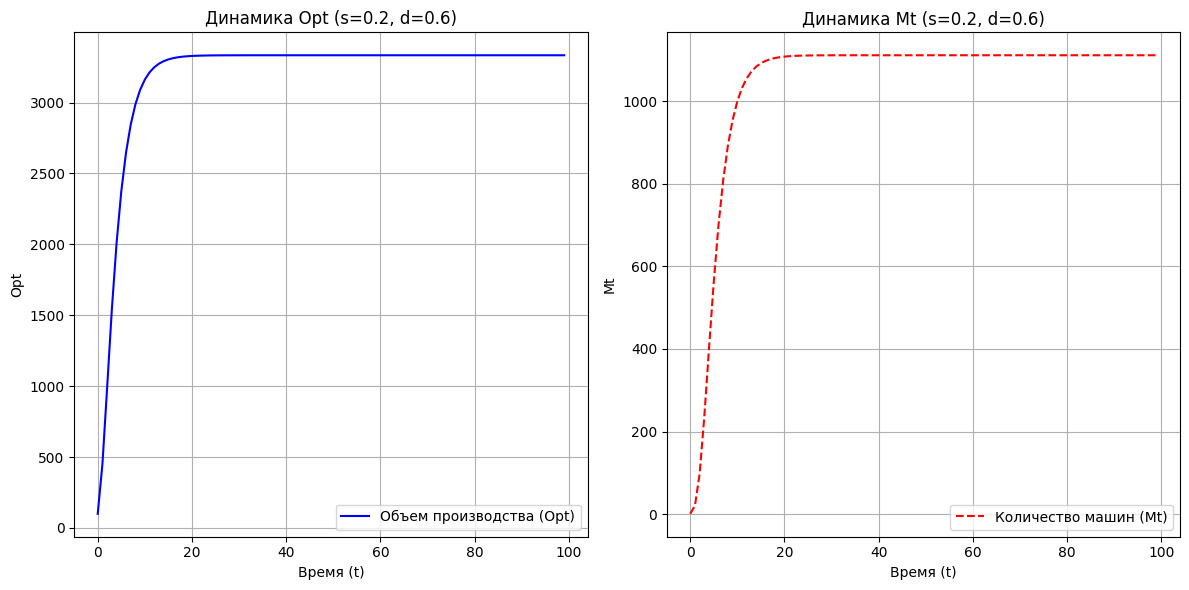

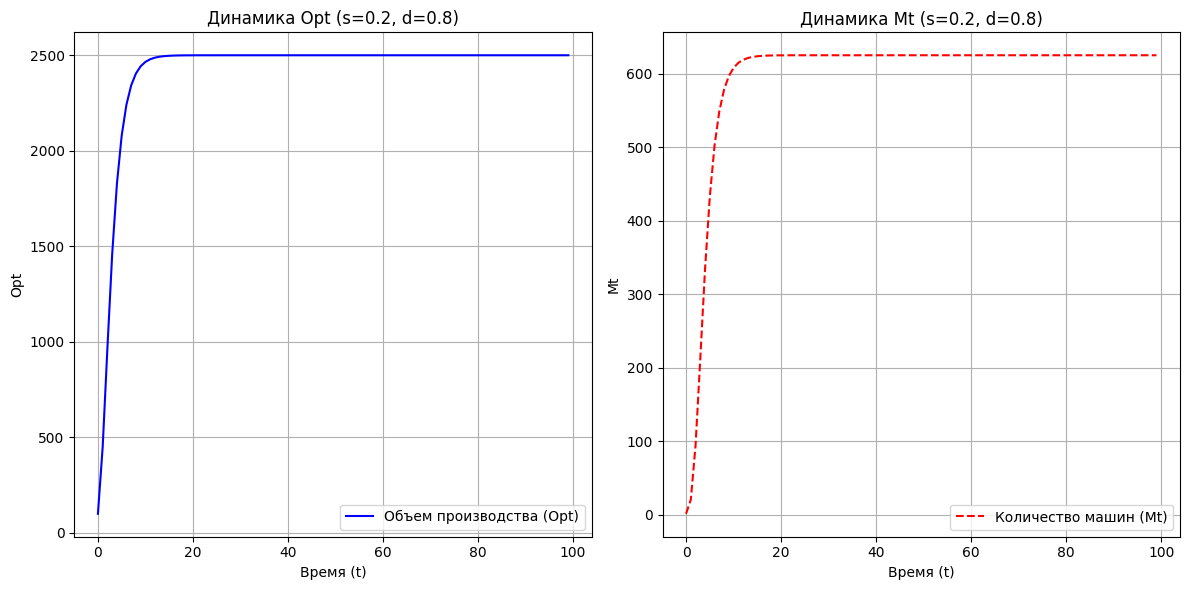

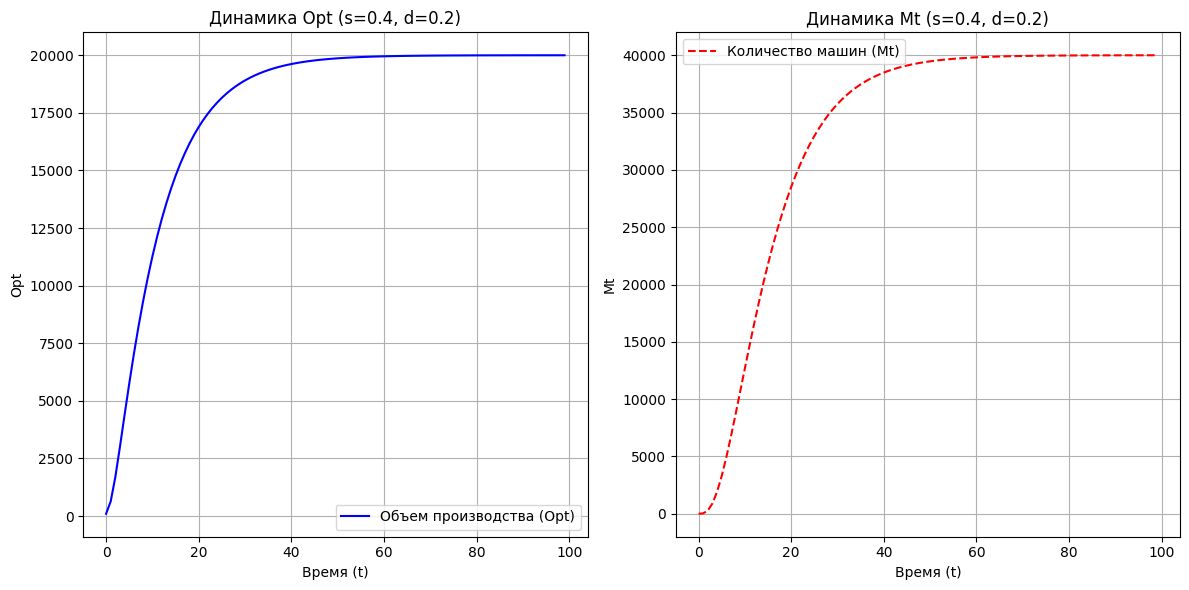

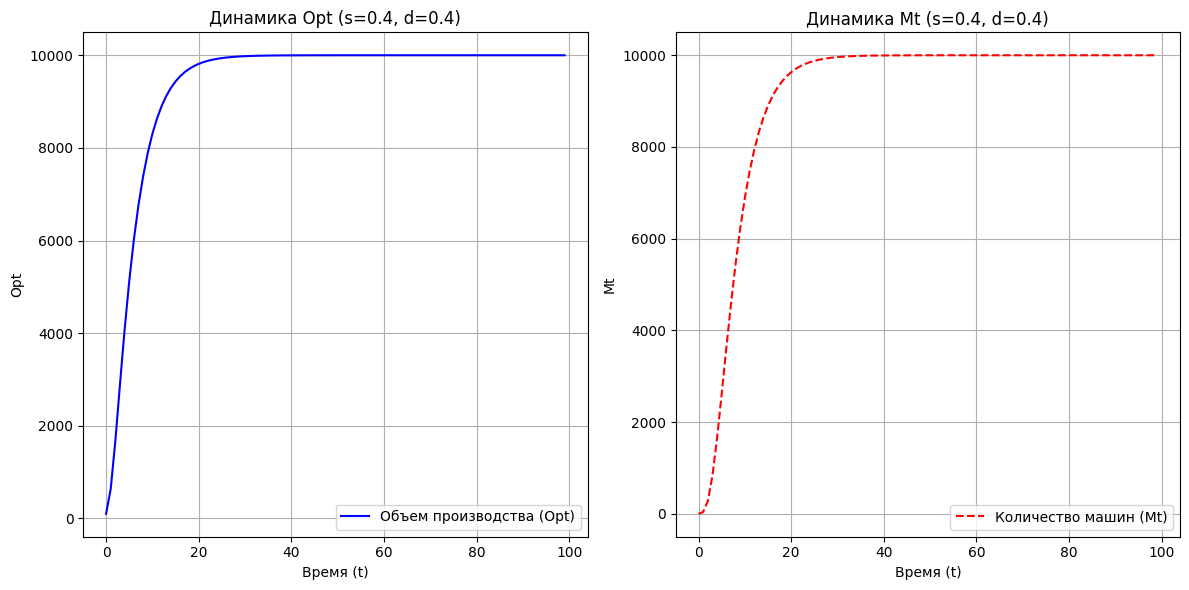

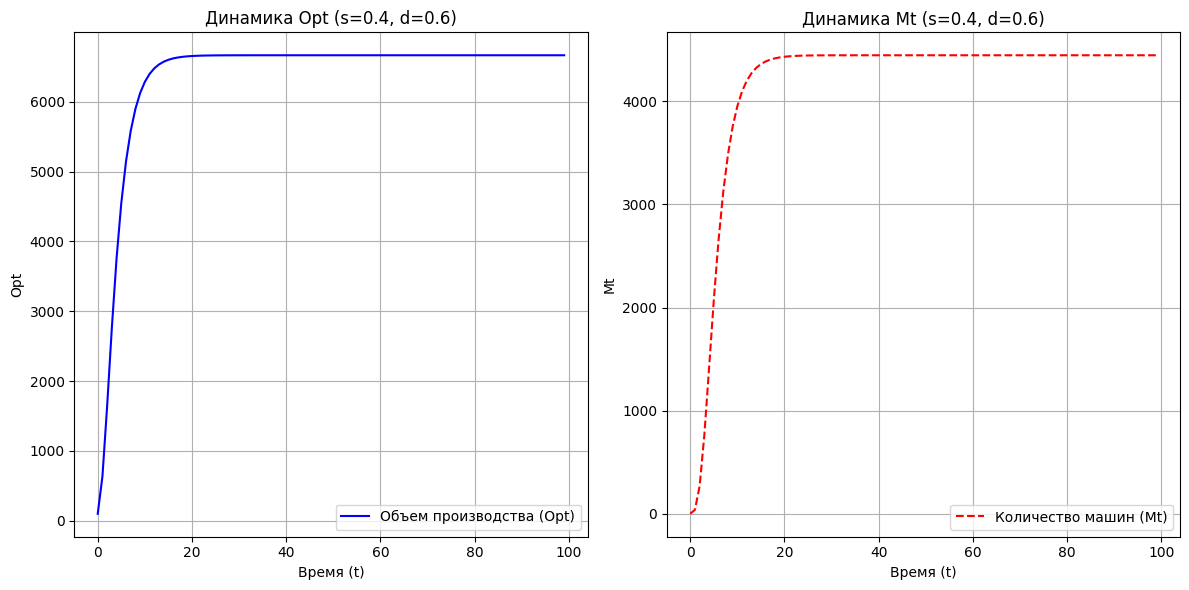

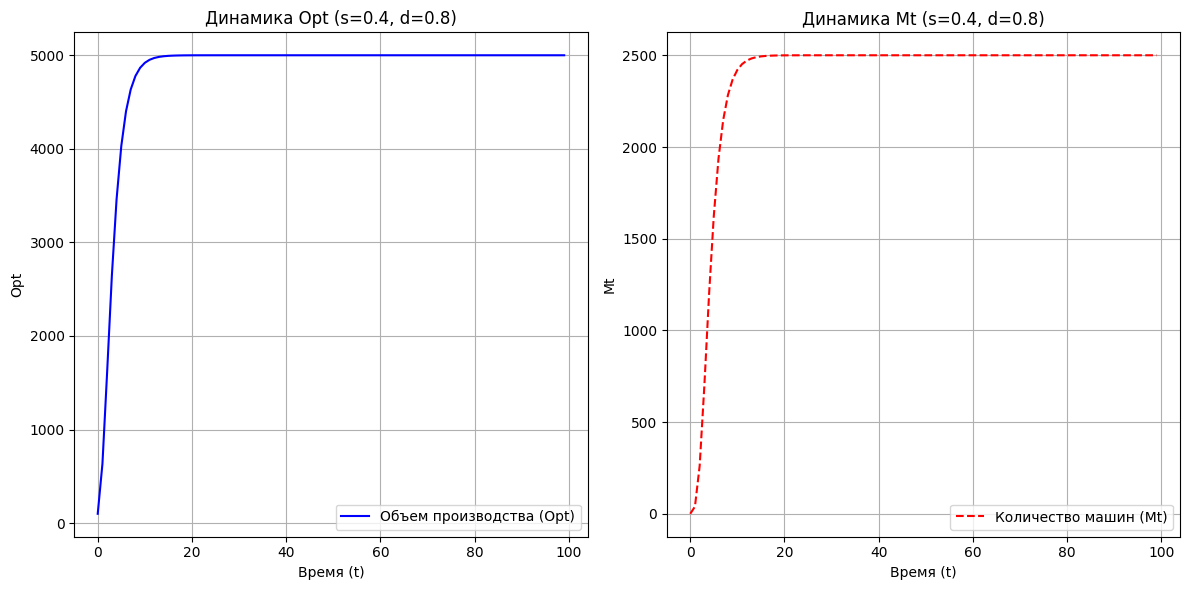

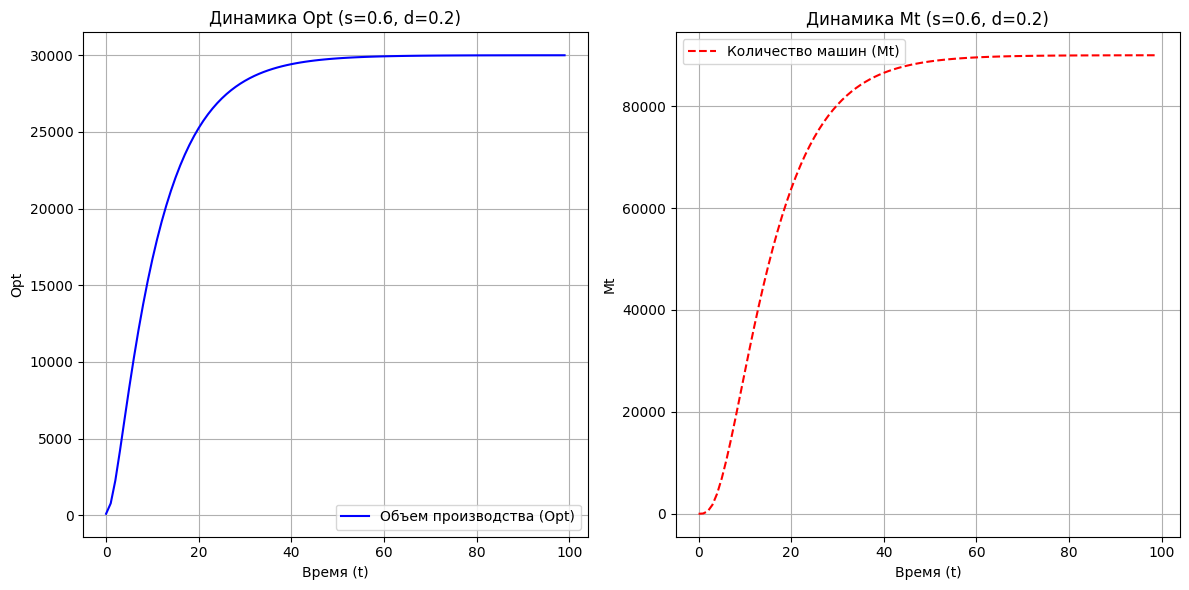

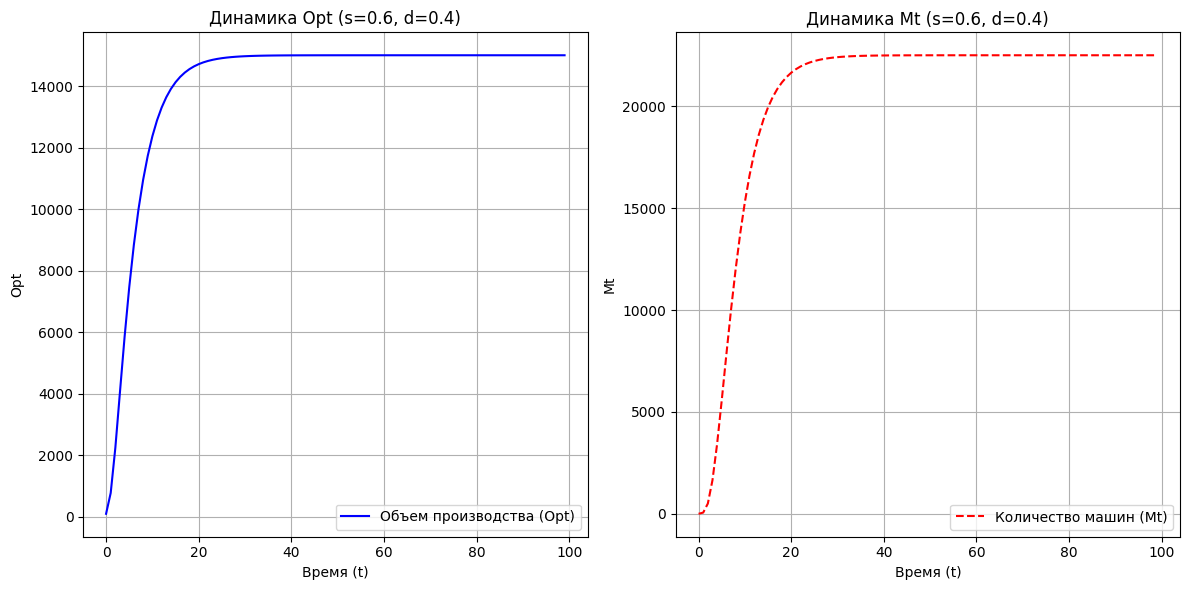

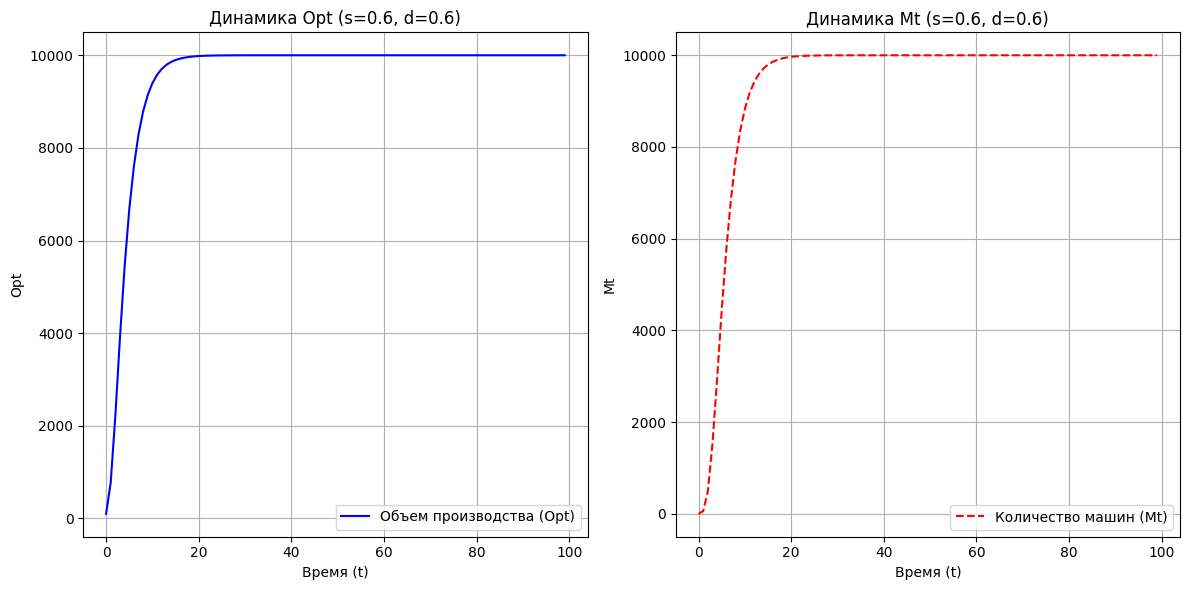

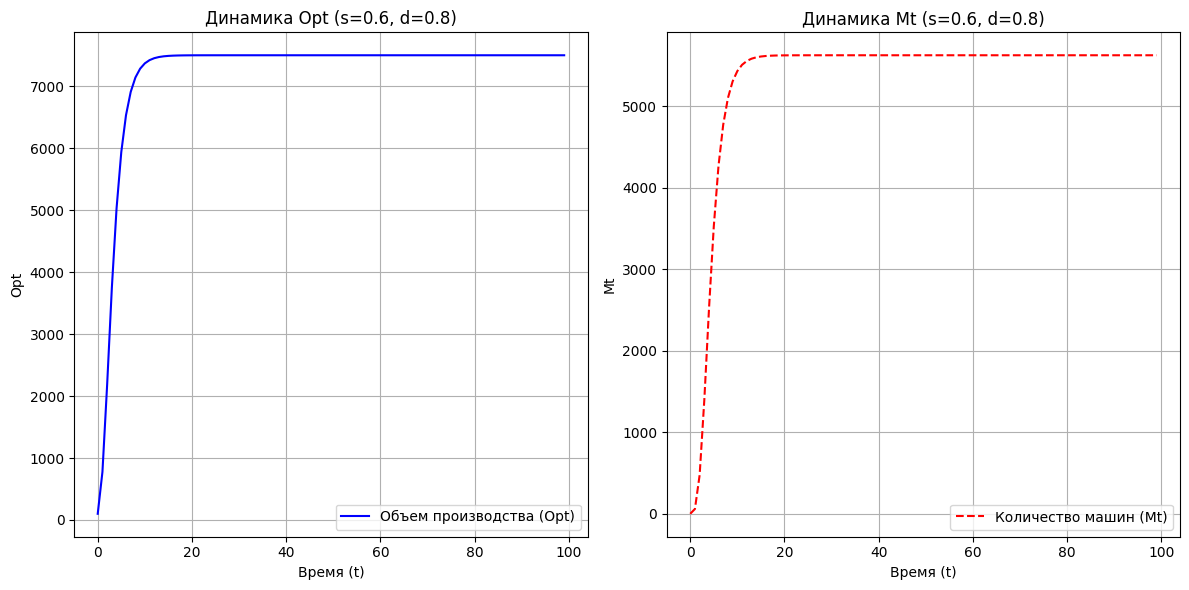

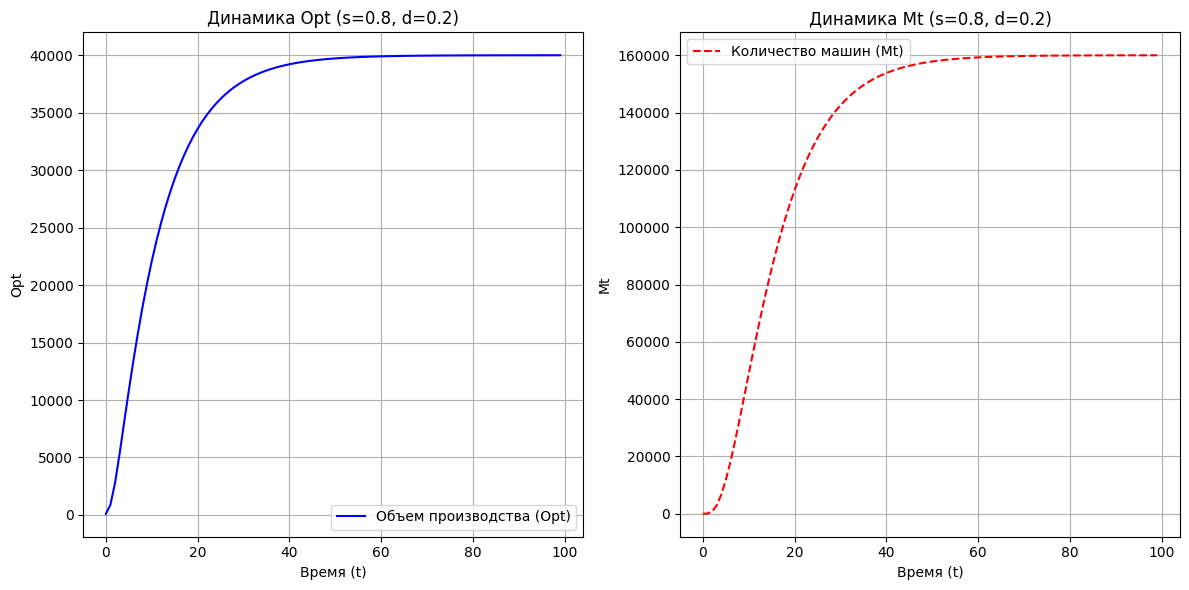

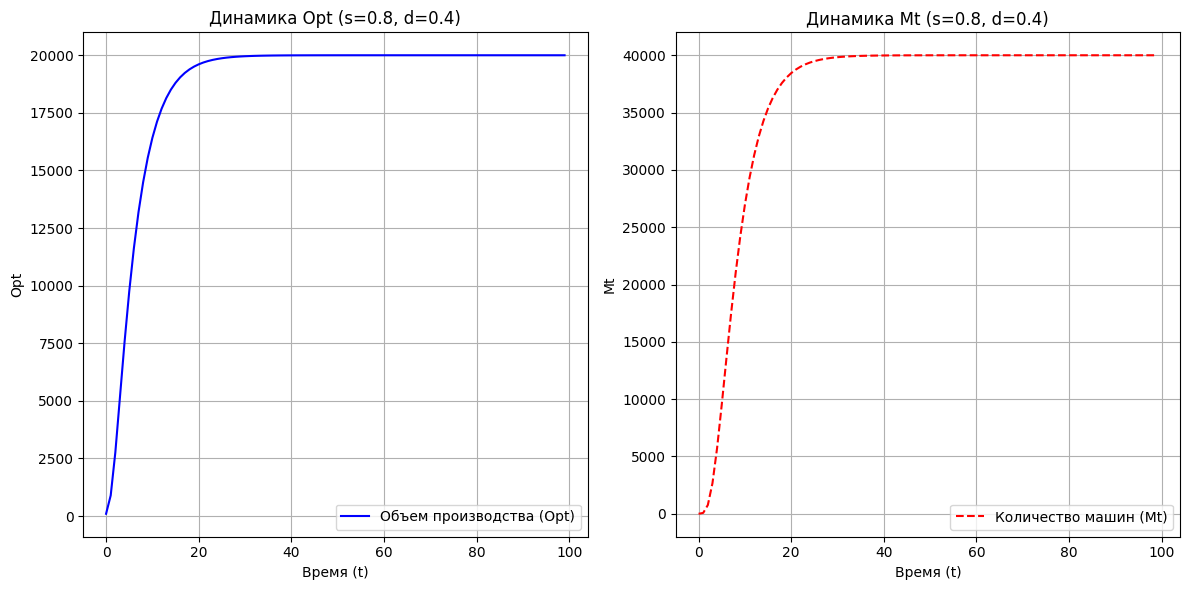

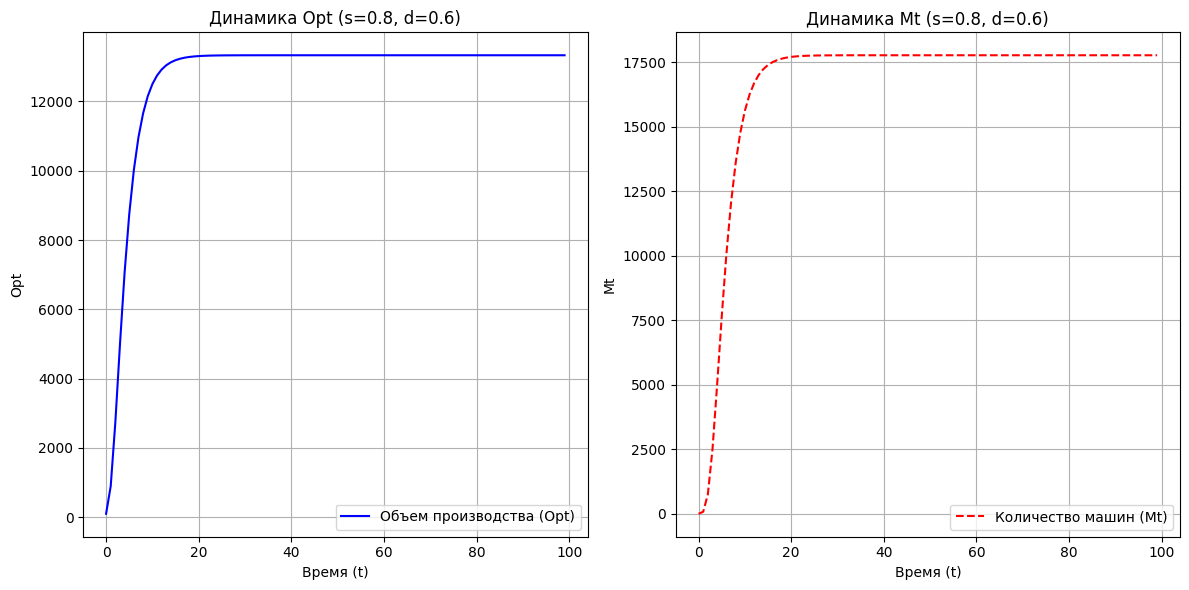

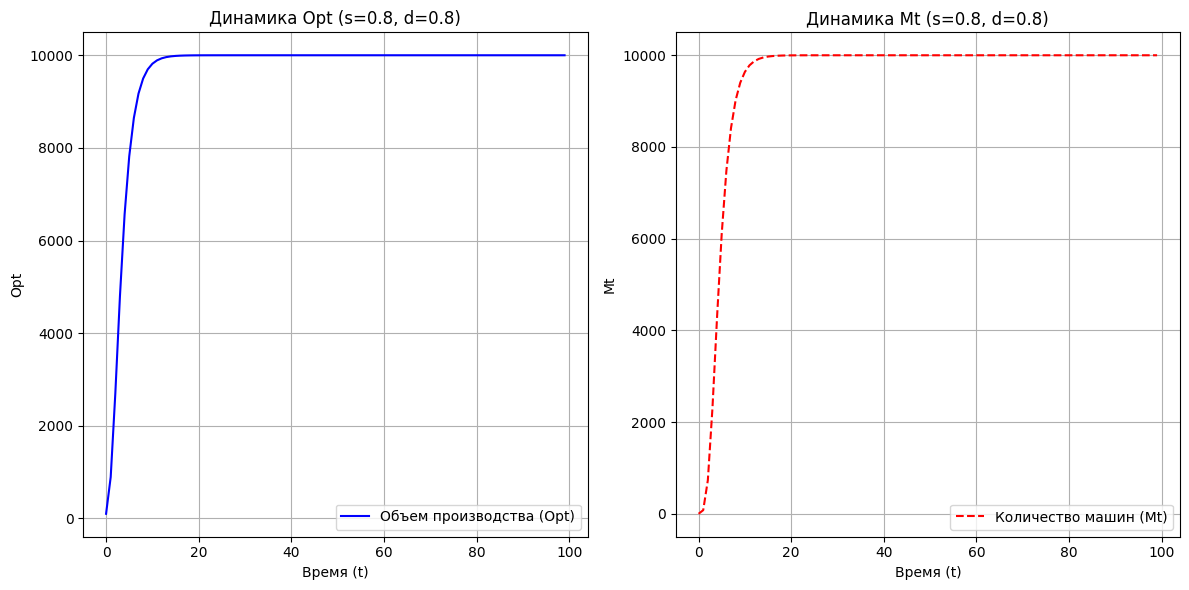

In [ ]:
d = 0.5

for s in [0.2, 0.4, 0.6, 0.8]:
    for d in [0.2, 0.4, 0.6, 0.8]:
        Opt, M, Ipt, Cpt = simulate_economy(s, d, T=100)

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(Opt, 'b-', label='Объем производства (Opt)')
        plt.xlabel('Время (t)')
        plt.ylabel('Opt')
        plt.title(f'Динамика Opt (s={s}, d={d})')
        plt.grid(True)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(M, 'r--', label='Количество машин (Mt)')
        plt.xlabel('Время (t)')
        plt.ylabel('Mt')
        plt.title(f'Динамика Mt (s={s}, d={d})')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()